In [1]:
#mv_model_rotation_error.sql
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns
from funclib.iolib import folder_open
from dblib import mssql
from plotlib.mplfuncs import FigWidthsInch as Size
from scipy import stats
import funclib.pandaslib as pdlib
W = Size.one_and_a_half_col.value
H = W*1

sns.set()

#gey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
#grey = ["#FFFFFF", "#111111"]
#sns.set_palette(sns.color_palette("cubehelix", 8))

sns.set(font="Times New Roman", font_scale=1.2, rc={"lines.linewidth": 1, "figure.figsize":(W, H)}) #
sns.set_style('ticks') #rc={'axes.grid':True}


C:\Python354x64\Lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sql = "select Species ,Marker ,Correction ,[Actual length] ,[Length estimate] ,Error as [Error (mm)] ,[Percent error] ,lens_subject_distance from v_fid_long_form_all order by Species, Marker, Correction_Order"

with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)


['Species',
 'Marker',
 'Correction',
 'Actual length',
 'Length estimate',
 'Error (mm)',
 'Percent error',
 'lens_subject_distance']

In [6]:
pdlib.GroupBy.PRECISION = 3
GB = pdlib.GroupBy(df, ['Species','Marker','Correction'], ['Error (mm)','Percent error'], pdlib.GroupBy.fCI_str(95))
res = GB.execute()
print(res)

                                                        Error (mm)  \
                                                         CI_str_95   
Species Marker     Correction                                        
Bass    Background Distorted           M=12.8 95% CIs [10.7, 14.9]   
                   Undistorted         M=13.3 95% CIs [10.9, 15.8]   
        Foreground Calib-profile    M=-6.74 95% CIs [-10.2, -3.32]   
                   Depth               M=11.4 95% CIs [7.34, 15.4]   
                   Distorted        M=-78.5 95% CIs [-84.1, -72.9]   
                   Iterative           M=17.5 95% CIs [13.3, 21.6]   
                   Profile          M=-7.51 95% CIs [-11.3, -3.78]   
                   Sensor-profile      M=13.2 95% CIs [9.31, 17.1]   
                   Undistorted      M=-44.7 95% CIs [-49.2, -40.1]   
        Laser      Calib-profile     M=1.74 95% CIs [-0.959, 4.45]   
                   Depth               M=18.0 95% CIs [14.9, 21.0]   
                   D

In [3]:
pdlib.GroupBy.PRECISION = 3
GB = pdlib.GroupBy(df, ['Marker','Correction'], ['Percent error'], pdlib.GroupBy.fCI_str(95), pdlib.GroupBy.fRMSE(0))
res = GB.execute()
print(res)

                                              Percent error           
                                                  CI_str_95     rmse_0
Marker     Correction                                                 
Background Distorted            M=2.41 95% CIs [2.09, 2.73]   2.777758
           Undistorted          M=2.33 95% CIs [1.93, 2.73]   2.890735
Foreground Calib-profile    M=-1.24 95% CIs [-1.67, -0.812]   2.132637
           Depth                M=2.24 95% CIs [1.76, 2.71]   2.953095
           Distorted         M=-12.0 95% CIs [-13.8, -10.2]  14.042389
           Iterative            M=3.13 95% CIs [2.60, 3.66]   3.807860
           Profile          M=-1.08 95% CIs [-1.57, -0.593]   2.254104
           Sensor-profile       M=1.80 95% CIs [1.23, 2.36]   2.919792
           Undistorted       M=-6.75 95% CIs [-7.84, -5.66]   8.086482
Laser      Calib-profile   M=-0.337 95% CIs [-0.824, 0.150]   2.069733
           Depth                M=2.90 95% CIs [2.31, 3.49]   3.809754
      

In [4]:
sql = "select Species ,Marker ,Correction ,[Actual length] ,[Length estimate] ,Error as [Error (mm)] ,[Percent error] ,lens_subject_distance from v_fid_long_form_all where Marker='laser' or Marker='foreground' order by Species, Marker, Correction_Order"

with mssql.Conn('imagedb', '(local)') as cnn:
    df_las_fg = pd.read_sql(sql, cnn)
list(df_las_fg)

['Species',
 'Marker',
 'Correction',
 'Actual length',
 'Length estimate',
 'Error (mm)',
 'Percent error',
 'lens_subject_distance']

In [5]:
pdlib.GroupBy.PRECISION = 3
GB = pdlib.GroupBy(df_las_fg, ['Correction'], ['Percent error'], pdlib.GroupBy.fCI_str(95), pdlib.GroupBy.fRMSE(0))
res = GB.execute()
print(res)

                                    Percent error           
                                        CI_str_95     rmse_0
Correction                                                  
Calib-profile    M=-0.775 95% CIs [-1.10, -0.445]   2.100508
Depth                 M=2.58 95% CIs [2.20, 2.96]   3.420740
Distorted          M=-12.9 95% CIs [-14.1, -11.7]  14.786304
Iterative             M=3.71 95% CIs [3.19, 4.22]   4.804354
Profile         M=-0.618 95% CIs [-0.957, -0.279]   2.099867
Sensor-profile        M=2.36 95% CIs [1.82, 2.89]   3.926736
Undistorted        M=-6.50 95% CIs [-7.13, -5.88]   7.479775


In [6]:
pdlib.GroupBy.PRECISION = 3
GB = pdlib.GroupBy(df_las_fg, ['Marker', 'Correction'], ['Percent error'], pdlib.GroupBy.fCI_str(95), pdlib.GroupBy.fRMSE(0))
res = GB.execute()
print(res)

                                              Percent error           
                                                  CI_str_95     rmse_0
Marker     Correction                                                 
Foreground Calib-profile    M=-1.24 95% CIs [-1.67, -0.812]   2.132637
           Depth                M=2.24 95% CIs [1.76, 2.71]   2.953095
           Distorted         M=-12.0 95% CIs [-13.8, -10.2]  14.042389
           Iterative            M=3.13 95% CIs [2.60, 3.66]   3.807860
           Profile          M=-1.08 95% CIs [-1.57, -0.593]   2.254104
           Sensor-profile       M=1.80 95% CIs [1.23, 2.36]   2.919792
           Undistorted       M=-6.75 95% CIs [-7.84, -5.66]   8.086482
Laser      Calib-profile   M=-0.337 95% CIs [-0.824, 0.150]   2.069733
           Depth                M=2.90 95% CIs [2.31, 3.49]   3.809754
           Distorted         M=-13.8 95% CIs [-15.5, -12.2]  15.455506
           Iterative            M=4.25 95% CIs [3.39, 5.11]   5.583936
      

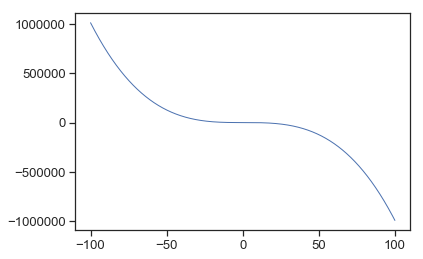

In [21]:
x=np.linspace(-100,100,20000)
fov = np.linspace(-100,100, 20000)
y = x + x**2 - x**3

plt.plot(x,y)

4